In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.switch_backend('agg')
import panel as pn
import param
pn.extension()

Column
    [0] Column(margin=5, name='Select seismic v..., width=300)
        [0] StaticText(value='<b>Select seismic v...)
        [1] Select(name='Volume', options=OrderedDict([('Penobscot',...]), value='Penobscot')
        [2] Select(name='Version', options=OrderedDict([('Penobscot.n...]), value='Penobscot.npy')
    [1] ParamMethod(method)
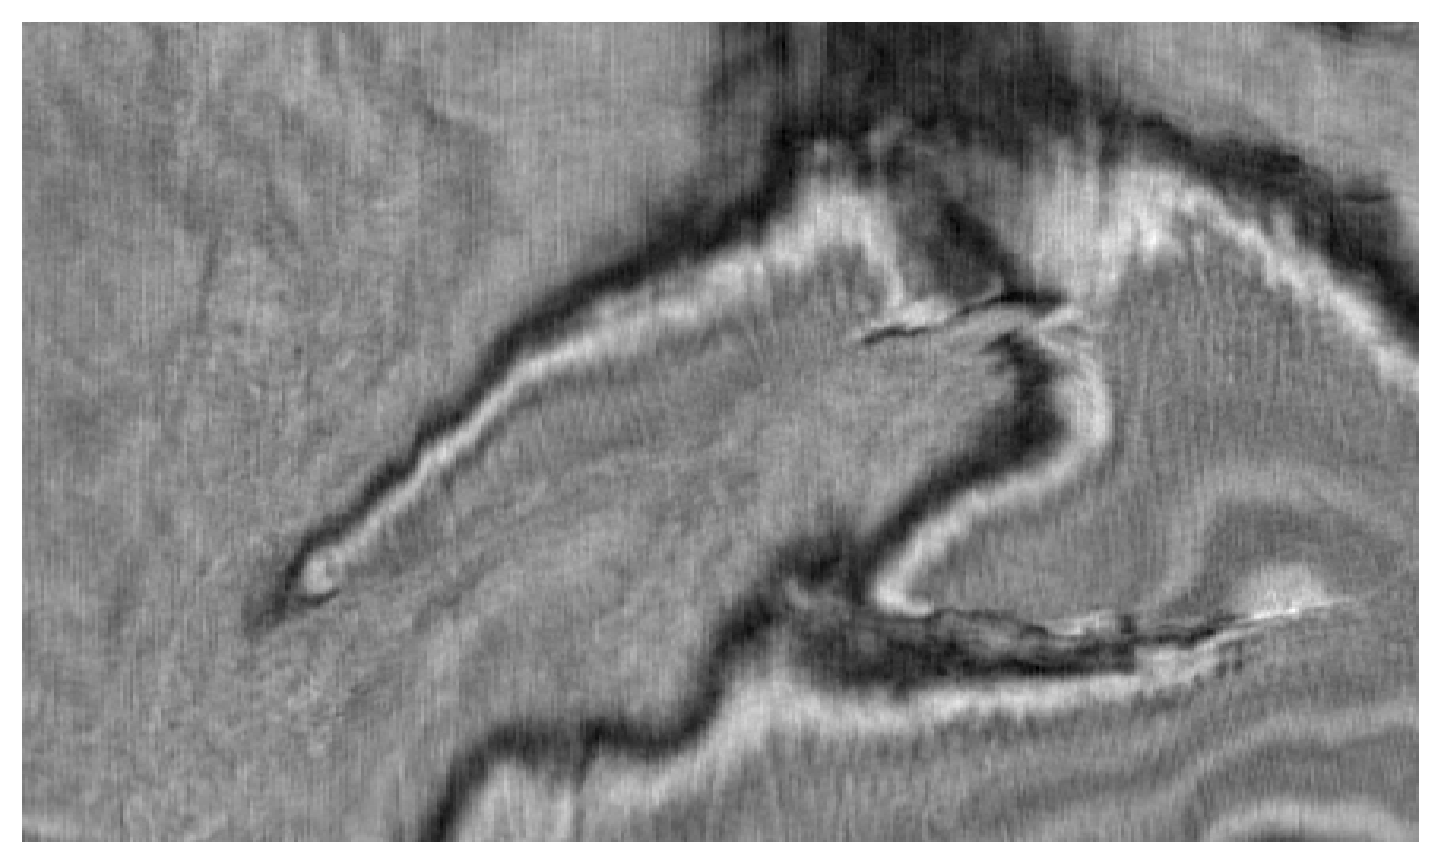

In [2]:
class PlotSeismicSlice(param.Parameterized):
    
    # Define volumes (first drop down menu)
    volume = param.ObjectSelector(default='Penobscot', 
                                  objects=['Penobscot', 'F3'])
    
    # Define versions for each volume (second drop down menu)
    #In this case, there's only one version per volume
    version = param.ObjectSelector(default ='Penobscot.npy',
                                               objects = (['Penobscot.npy']))

    _version = {
    'Penobscot': (['Penobscot.npy']),
    'F3': (['F3_original_subvolume_IL230-430_XL475-675_T200-1800.npy'])
    }
    
    # This reactive bit allows the version selector to watch for the volume selector
    @param.depends('volume', watch=True)
    def _update_version(self):
        version = self._version[self.volume]
        self.param['version'].objects = version
        self.version = version[0]
    
    # This reactive makes a plot for a single slice (hard-coded for now)    
    # of the selected version
    # of the selected volume
    @param.depends('version')     
    def make_plot(self):
        fig = plt.figure(figsize = (10,6))  
        plt.axis('off')
        plt.imshow(np.load('../../images_and_data/' +self.version)[:,:,60], cmap='gray', 
                   aspect = 'auto', interpolation = 'none')
        plt.tight_layout()                                  
        plt.close(fig=fig)
        return fig
 
viewer = PlotSeismicSlice(name='Select seismic volume and version below')
pn.Column(viewer.param, viewer.make_plot)

In [3]:
 _versions = {
    'Penobscot': ['Penobscot.npy'],
    'F3': ['F3_original_subvolume_IL230-430_XL475-675_T200-1800.npy']
    }

volume = pn.widgets.Select(
    value='F3', 
    options=['Penobscot', 'F3']
)

version = pn.widgets.Select(
    value=_versions[volume.value][0], 
    options=_versions[volume.value]
)

@pn.depends(volume.param.value, watch=True)
def _update_versions(volume):
    versions = _versions[volume]
    version.options = versions
    version.value = versions[0]
    
pn.Row(volume, version)

Row
    [0] Select(options=['Penobscot', 'F3'], value='F3')
    [1] Select(options=['F3_original_subvolume_IL...], value='F3_original_subvolume_IL2...)

#### Remember neither of these work in Jupyter Lab (the updates do not work), they only work in Jupyter Notebook